# EDA — Exploratory Data Analysis

Load dataset and inspect distributions, correlations, and simple scatter plots.

In [ ]:
import sys
import os

#print(os.getcwd())
# Get the absolute path to the project root (one directory up from where the script/notebook is)
# This assumes 'src' is in the parent directory of where you are running the script/notebook.
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the Python path
if project_root not in sys.path:
    sys.path.append(project_root)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.features.build_features import featurize
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
# Load data
DATA_PATH = PROJECT_ROOT / "data" / "01_raw" / "dataset.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,catalyst,facet,adsorbate,d_band_center,pauling_en,atomic_radius,valence_electrons,adsorption_energy
0,Cu,111,CO*,-1.81,1.9,128,11,-0.67
1,Cu,111,COOH*,-1.65,1.9,128,11,-0.42
2,Cu,111,OCHO*,-1.72,1.9,128,11,-0.55
3,Cu,100,CO*,-1.92,1.9,128,11,-0.71
4,Cu,100,COOH*,-1.74,1.9,128,11,-0.48


In [7]:
print('Rows, cols:', df.shape)
print(df.describe())

Rows, cols: (78, 8)
            facet  d_band_center  pauling_en  atomic_radius  \
count   78.000000      78.000000   78.000000      78.000000   
mean   105.500000      -2.121538    2.033846     133.076923   
std      5.535599       1.055655    0.213525       7.880222   
min    100.000000      -4.010000    1.830000     124.000000   
25%    100.000000      -2.810000    1.900000     126.000000   
50%    105.500000      -1.935000    1.920000     132.000000   
75%    111.000000      -1.230000    2.200000     139.000000   
max    111.000000      -0.550000    2.540000     145.000000   

       valence_electrons  adsorption_energy  
count          78.000000          78.000000  
mean           10.230769          -0.676282  
std             1.055881           0.378963  
min             8.000000          -1.470000  
25%            10.000000          -0.990000  
50%            10.000000          -0.675000  
75%            11.000000          -0.342500  
max            12.000000          -0.060000 

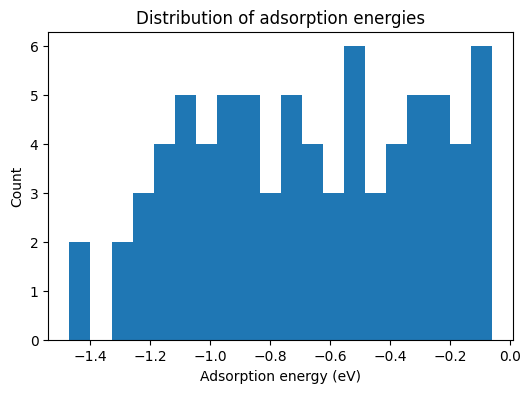

In [8]:
# Histogram of adsorption energies
plt.figure(figsize=(6,4))
plt.hist(df['adsorption_energy'], bins=20)
plt.xlabel('Adsorption energy (eV)')
plt.ylabel('Count')
plt.title('Distribution of adsorption energies')
plt.show()

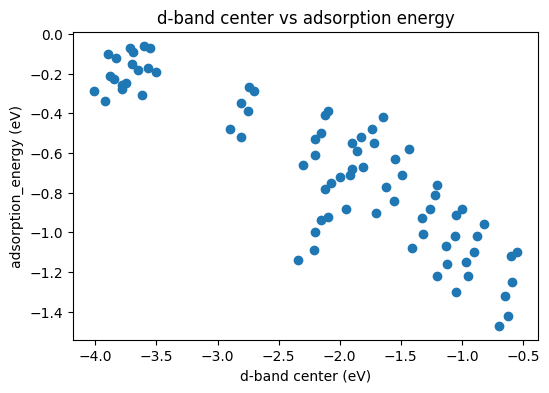

In [9]:
# Scatter: d-band vs adsorption
plt.figure(figsize=(6,4))
plt.scatter(df['d_band_center'], df['adsorption_energy'])
plt.xlabel('d-band center (eV)')
plt.ylabel('adsorption_energy (eV)')
plt.title('d-band center vs adsorption energy')
plt.show()

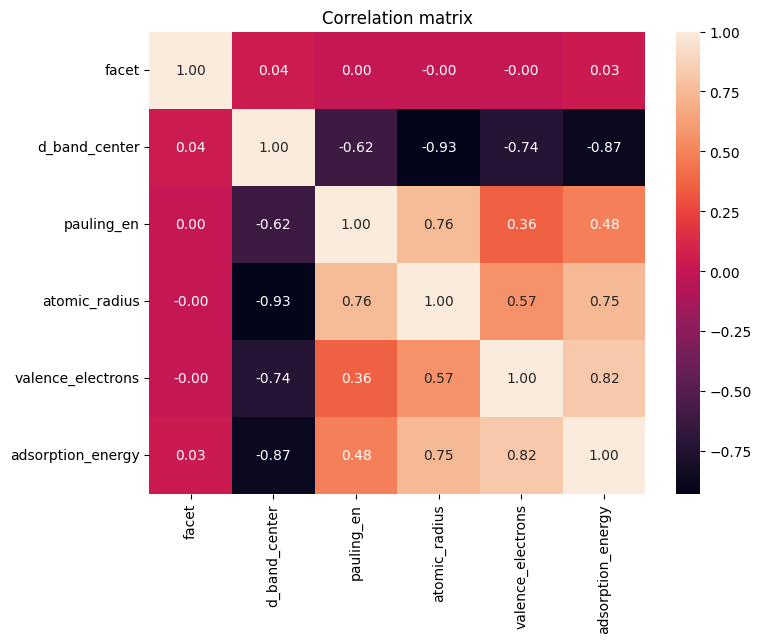

In [10]:
# Correlation heatmap for numeric columns
num = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(num.corr(), annot=True, fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [ ]:
# Quick feature preview using featurizer
X, y = featurize(df)
X.head()

NameError: name 'featurize' is not defined